# Ev Fiyatlarının Regresyon Modelleri ile Tahmini

Bu proje ile elimizdeki veri setini kullanarak satılık olan evlerin çeşitli regresyon yöntemleri ile fiyatlarını tahmin etmeyi ve tahminler sonucunda hangi regresyon modelinin fiyatları daha iyi tahmin ettiğinin karşılaştırmalı olarak yorumlanması hedeflenmektedir.

__Projeyi Hazırlayan:__ Alican Şahin

#### Veri Seti
##### Açıklama
Proje'de ABD'nin Iowa eyaletinin Ames şehrindeki konut evlerinin birçok özelliğinin tanımlandığı 79 değişkenli bir veri seti kullanılacaktır.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

##### Parametreler

- __SalePrice:__ __Dolar cinsinden satış fiyatı. Bu, tahmin etmeye çalıştığımız hedef değişkendir.__
- __MSSubClass:__ The building class
- __MSZoning:__ The general zoning classification
- __LotFrontage:__ Linear feet of street connected to property
- __LotArea:__ Lot size in square feet
- __Street:__ Type of road access
- __Alley:__ Type of alley access
- __LotShape:__ General shape of property
- __LandContour:__ Flatness of the property
- __Utilities:__ Type of utilities available
- __LotConfig:__ Lot configuration
- __LandSlope:__ Slope of property
- __Neighborhood:__ Physical locations within Ames city limits
- __Condition1:__ Proximity to main road or railroad
- __Condition2:__ Proximity to main road or railroad (if a second is present)
- __BldgType:__ Type of dwelling
- __HouseStyle:__ Style of dwelling
- __OverallQual:__ Overall material and finish quality
- __OverallCond:__ Overall condition rating
- __YearBuilt:__ Original construction date
- __YearRemodAdd:__ Remodel date
- __RoofStyle:__ Type of roof
- __RoofMatl:__ Roof material
- __Exterior1st:__ Exterior covering on house
- __Exterior2nd:__ Exterior covering on house (if more than one material)
- __MasVnrType:__ Masonry veneer type
- __MasVnrArea:__ Masonry veneer area in square feet
- __ExterQual:__ Exterior material quality
- __ExterCond:__ Present condition of the material on the exterior
- __Foundation:__ Type of foundation
- __BsmtQual:__ Height of the basement
- __BsmtCond:__ General condition of the basement
- __BsmtExposure:__ Walkout or garden level basement walls
- __BsmtFinType1:__ Quality of basement finished area
- __BsmtFinSF1:__ Type 1 finished square feet
- __BsmtFinType2:__ Quality of second finished area (if present)
- __BsmtFinSF2:__ Type 2 finished square feet
- __BsmtUnfSF:__ Unfinished square feet of basement area
- __TotalBsmtSF:__ Total square feet of basement area
- __Heating:__ Type of heating
- __HeatingQC:__ Heating quality and condition
- __CentralAir:__ Central air conditioning
- __Electrical:__ Electrical system
- __1stFlrSF:__ First Floor square feet
- __2ndFlrSF:__ Second floor square feet
- __LowQualFinSF:__ Low quality finished square feet (all floors)
- __GrLivArea:__ Above grade (ground) living area square feet
- __BsmtFullBath:__ Basement full bathrooms
- __BsmtHalfBath:__ Basement half bathrooms
- __FullBath:__ Full bathrooms above grade
- __HalfBath:__ Half baths above grade
- __Bedroom:__ Number of bedrooms above basement level
- __Kitchen:__ Number of kitchens
- __KitchenQual:__ Kitchen quality
- __TotRmsAbvGrd:__ Total rooms above grade (does not include bathrooms)
- __Functional:__ Home functionality rating
- __Fireplaces:__ Number of fireplaces
- __FireplaceQu:__ Fireplace quality
- __GarageType:__ Garage location
- __GarageYrBlt:__ Year garage was built
- __GarageFinish:__ Interior finish of the garage
- __GarageCars:__ Size of garage in car capacity
- __GarageArea:__ Size of garage in square feet
- __GarageQual:__ Garage quality
- __GarageCond:__ Garage condition
- __PavedDrive:__ Paved driveway
- __WoodDeckSF:__ Wood deck area in square feet
- __OpenPorchSF:__ Open porch area in square feet
- __EnclosedPorch:__ Enclosed porch area in square feet
- __3SsnPorch:__ Three season porch area in square feet
- __ScreenPorch:__ Screen porch area in square feet
- __PoolArea:__ Pool area in square feet
- __PoolQC:__ Pool quality
- __Fence:__ Fence quality
- __MiscFeature:__ Miscellaneous feature not covered in other categories
- __MiscVal:__ Value of miscellaneous feature
- __MoSold:__ Month Sold
- __YrSold:__ Year Sold
- __SaleType:__ Type of sale
- __SaleCondition:__ Condition of sale

### Kütüphanelerin ve Veri Setinin Eklenmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import statsmodels.api as sm 

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("### TRAIN DATA HEAD ###")
train.head()

### TRAIN DATA HEAD ###


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
print("### TEST DATA HEAD ###")
test.head()

### TEST DATA HEAD ###


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
print("### TRAIN DATA INFO ###")
train.info()

### TRAIN DATA INFO ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null

In [4]:
print("### TEST DATA INFO ###")
test.info()

### TEST DATA INFO ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null 

In [5]:
train['SalePrice'].describe().T

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
#çarpıklık ve basıklık katsayılarına bakalım 
print("Çarpıklık: %f" % train['SalePrice'].skew())
print("Basıklık: %f" % train['SalePrice'].kurt())

Çarpıklık: 1.882876
Basıklık: 6.536282


### Veri Görselleştirme ve Veriyi Anlama


 mu = 180921.20 and sigma = 79415.29



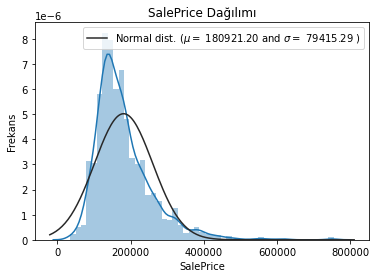

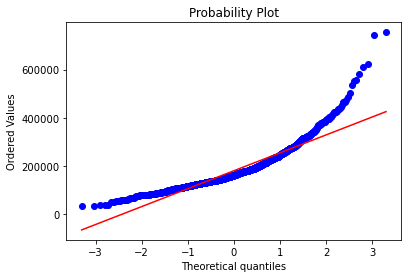

In [7]:
sns.distplot(train['SalePrice'], fit=norm);

# mu ve sigma değerlerinin hesaplanması
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Dağılım grafiklerinin çizdirilmesi
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frekans')
plt.title('SalePrice Dağılımı')
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Görüldüğü üzere SalePrice(satış fiyatı) değeri doğru çarpık. Bunu normal dağıtmaya ihtiyacımız var. 

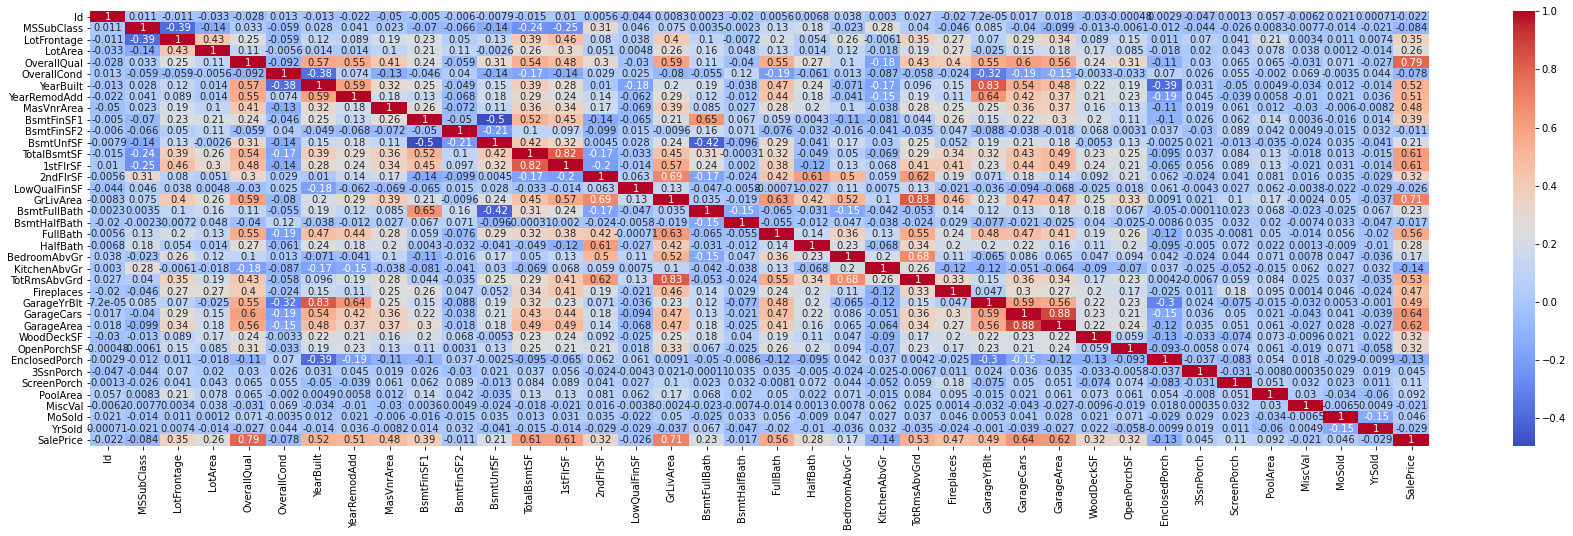

In [8]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

En ilişkili parametreleri çizim üzerindeki sayısal değerlerde -yukarıdaki grafikte- görebilir. İlerleyen aşamalarda bu grafikten faydalanarak en ilişkili parametreleri alarak makine öğrenme modelleri için birer özellik olarak kullanacağız.

In [9]:
corr = train.corr()
corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [10]:
train = train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
test=test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

Satış Fiyatları korelasyonunun 0,3'ünden az olan bazı sütunları kaldırdık.

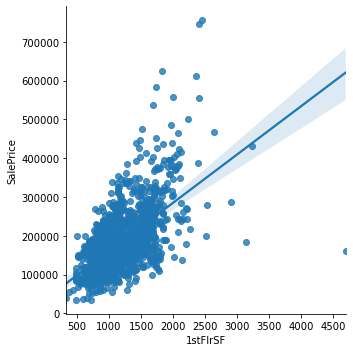

In [11]:
# 1stFlrSF SalePrice ile çok ilişkili görünüyor.
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train)

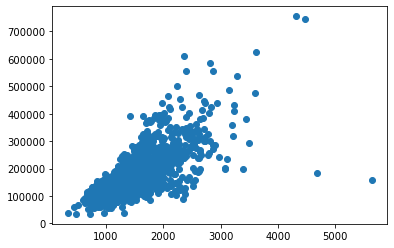

In [12]:
plt.scatter(x= 'GrLivArea', y='SalePrice', data = train)

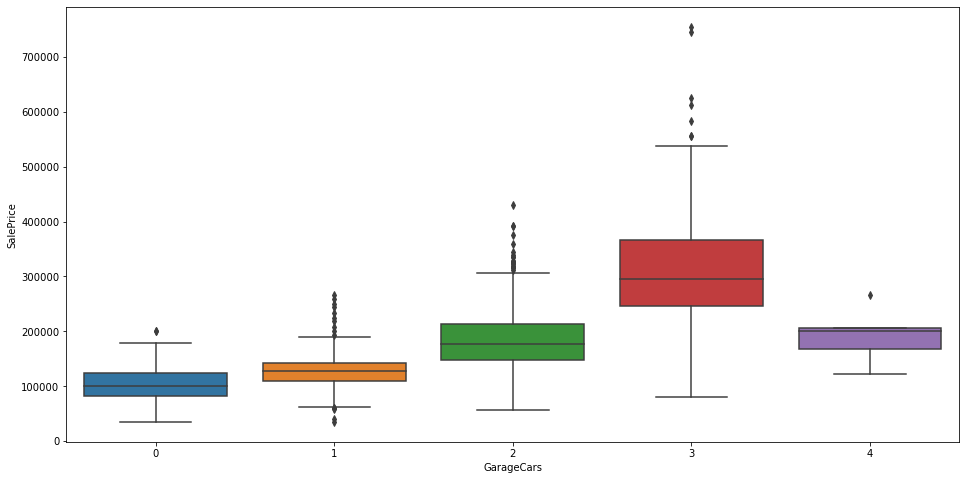

In [13]:
plt.figure(figsize=(16,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=train)
plt.show()

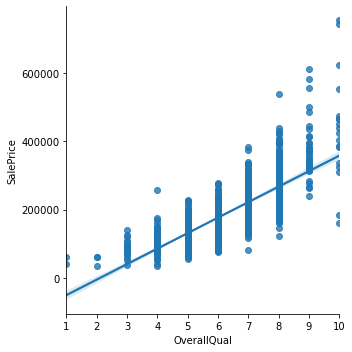

In [14]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train)

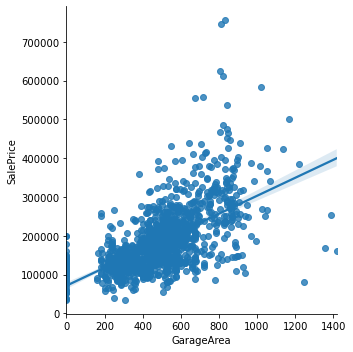

In [15]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train)

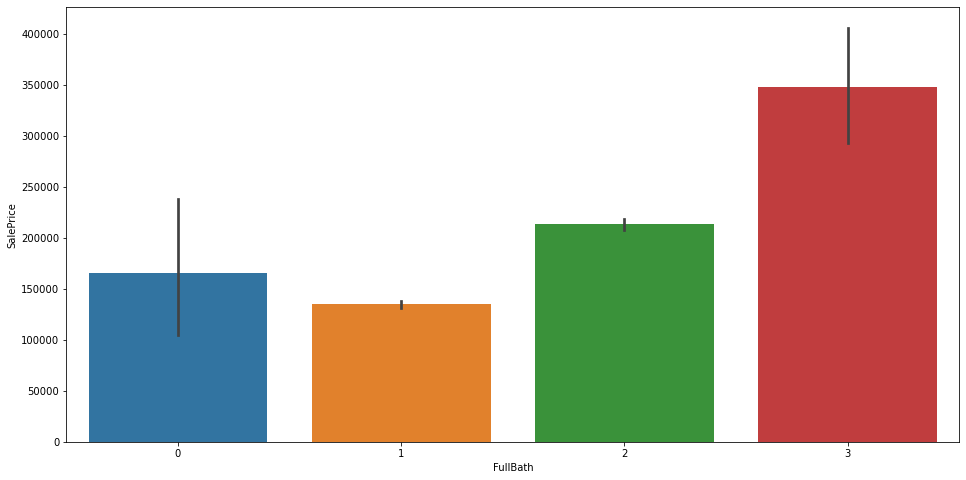

In [16]:
plt.figure(figsize=(16,8))
sns.barplot(x='FullBath',y = 'SalePrice',data=train)
plt.show()

### Veri Temizleme
Eksik verileri temizleyip tüm sütunları nümerik veya kategorik verilere dönüştürmeliyiz.  

##### Kayıp Veri Kontrolü

In [17]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/len(train)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
2ndFlrSF,0,0.000000
OverallQual,0,0.000000
YearBuilt,0,0.000000
YearRemodAdd,0,0.000000
BsmtFinSF1,0,0.000000
TotalBsmtSF,0,0.000000
1stFlrSF,0,0.000000


Buradan da görüleceği üzere train data'sından bazı parametlerelerde çok fazla eksik değer mevcut. Bu sebeple train datası için toplam eksik değeri 81'den büyük olan satırları silmeliyiz.

In [18]:
# eksik verileri çıkaralım
train = train.drop((missing_data[missing_data['Total'] > 81]).index,1)

In [19]:
train.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     81
MasVnrArea       8
SalePrice        0
2ndFlrSF         0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
dtype: int64

Aynı işlemleri test data'sı için de yapalım.

In [20]:
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
TotalBsmtSF,1,0.000685
GarageArea,1,0.000685
GarageCars,1,0.000685
BsmtFinSF1,1,0.000685
OverallQual,0,0.000000
YearBuilt,0,0.000000
YearRemodAdd,0,0.000000


Test datasında ise 78'den fazla eksik verisi olanları çıkaralım.

In [21]:
test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

In [22]:
test.isnull().sum().sort_values(ascending = False).head(20)

GarageYrBlt     78
MasVnrArea      15
GarageArea       1
GarageCars       1
BsmtFinSF1       1
TotalBsmtSF      1
OpenPorchSF      0
1stFlrSF         0
YearBuilt        0
YearRemodAdd     0
GrLivArea        0
2ndFlrSF         0
WoodDeckSF       0
FullBath         0
TotRmsAbvGrd     0
Fireplaces       0
OverallQual      0
dtype: int64

Kalan eksik verileri düzenleyelim. 

In [23]:
train.dtypes

OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
BsmtFinSF1        int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
GrLivArea         int64
FullBath          int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageYrBlt     float64
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
OpenPorchSF       int64
SalePrice         int64
dtype: object

N/A alanlara ilgili kolonun ortalama değerini yazdıralım 

In [24]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [25]:
train.isnull().sum().sort_values(ascending=False).head(10)

SalePrice       0
OpenPorchSF     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
dtype: int64

Görüldüğü üzere train datasında eksik veri kalmadı. Aynı işlemi test için de yapalım.

In [26]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

In [27]:
test.isnull().sum().sort_values(ascending=False).head(10)

OpenPorchSF     0
2ndFlrSF        0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
WoodDeckSF      0
dtype: int64

In [28]:
# Kategorik boolean mask
categorical_feature_mask = train.dtypes==object
# kategorik sütunları maske kullanarak filtreleyip listeye dönüştür
categorical_cols = train.columns[categorical_feature_mask].tolist()

In [29]:
categorical_cols

[]

In [30]:
data = pd.get_dummies(train, columns=categorical_cols)

In [31]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#train[categorical_cols] = train[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [32]:
#Kategorik boolean mask
categorical_feature_mask_test = test.dtypes==object
# kategorik sütunları maske kullanarak filtreleyip listeye dönüştür
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()

In [33]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#test[categorical_cols_test] = test[categorical_cols_test].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [34]:
train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [35]:
test.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,5,1961,1961,0.0,468.0,882.0,896,0,896,1,5,0,1961.0,1.0,730.0,140,0
1,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,1,6,0,1958.0,1.0,312.0,393,36
2,5,1997,1998,0.0,791.0,928.0,928,701,1629,2,6,1,1997.0,2.0,482.0,212,34
3,6,1998,1998,20.0,602.0,926.0,926,678,1604,2,7,1,1998.0,2.0,470.0,360,36
4,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,2,5,0,1992.0,2.0,506.0,0,82


Şimdi model için bazı özellikler seçeceğiz. Bunun için korelasyon matrisini kullanacağız ve satış fiyatı ile en ilişkili olanı seçeceğiz.

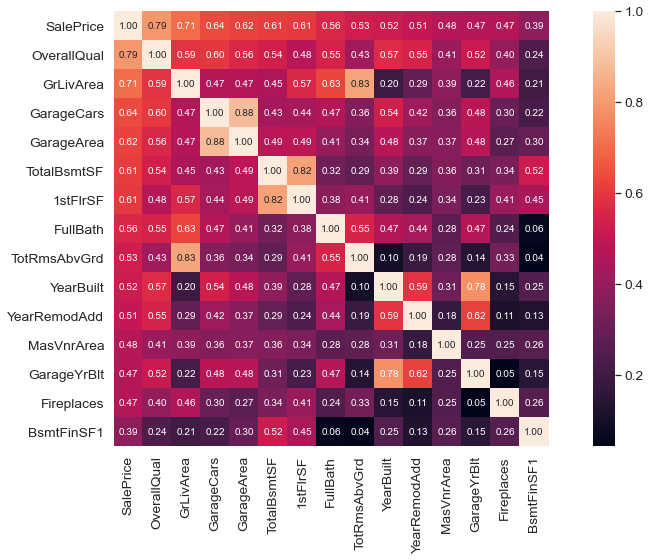

In [36]:
# saleprice korelasyon matrisi
k = 15 # ısı haritası değişken sayısı
plt.figure(figsize=(16,8))
corrmat = train.corr()
# saleprice ile en iyi ilişkili 15 özelliğin seçilmesi
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Isı haritası grafigi bize SalePrice ile en çok ilişkili sütunları veriyor. Bu grafikten faydalanarak aşağıdaki kolonları tahminleme için alıp diğer parametreleri yani salePrice ile ilişkisi en düşük olanları kullanmayacağız.

In [37]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

train değişkenine saleprice değişkeni ile en çok ilişkili 14 sütun + saleprice sütunu olmak üzere toplam 15 sütun atayarak fazlalıklardan kurtulduk.

In [38]:
train = train[cols]

Tahminlemeyi buradaki verilerle yapacağımız için SalePrice sütununu sildik.

In [39]:
test = test[cols.drop('SalePrice')]

Aşağıdaki grafiklerle SalePrice sütununun diğer tüm parametrelerle olan ilişkilerini daha detaylı inceleyebiliriz.

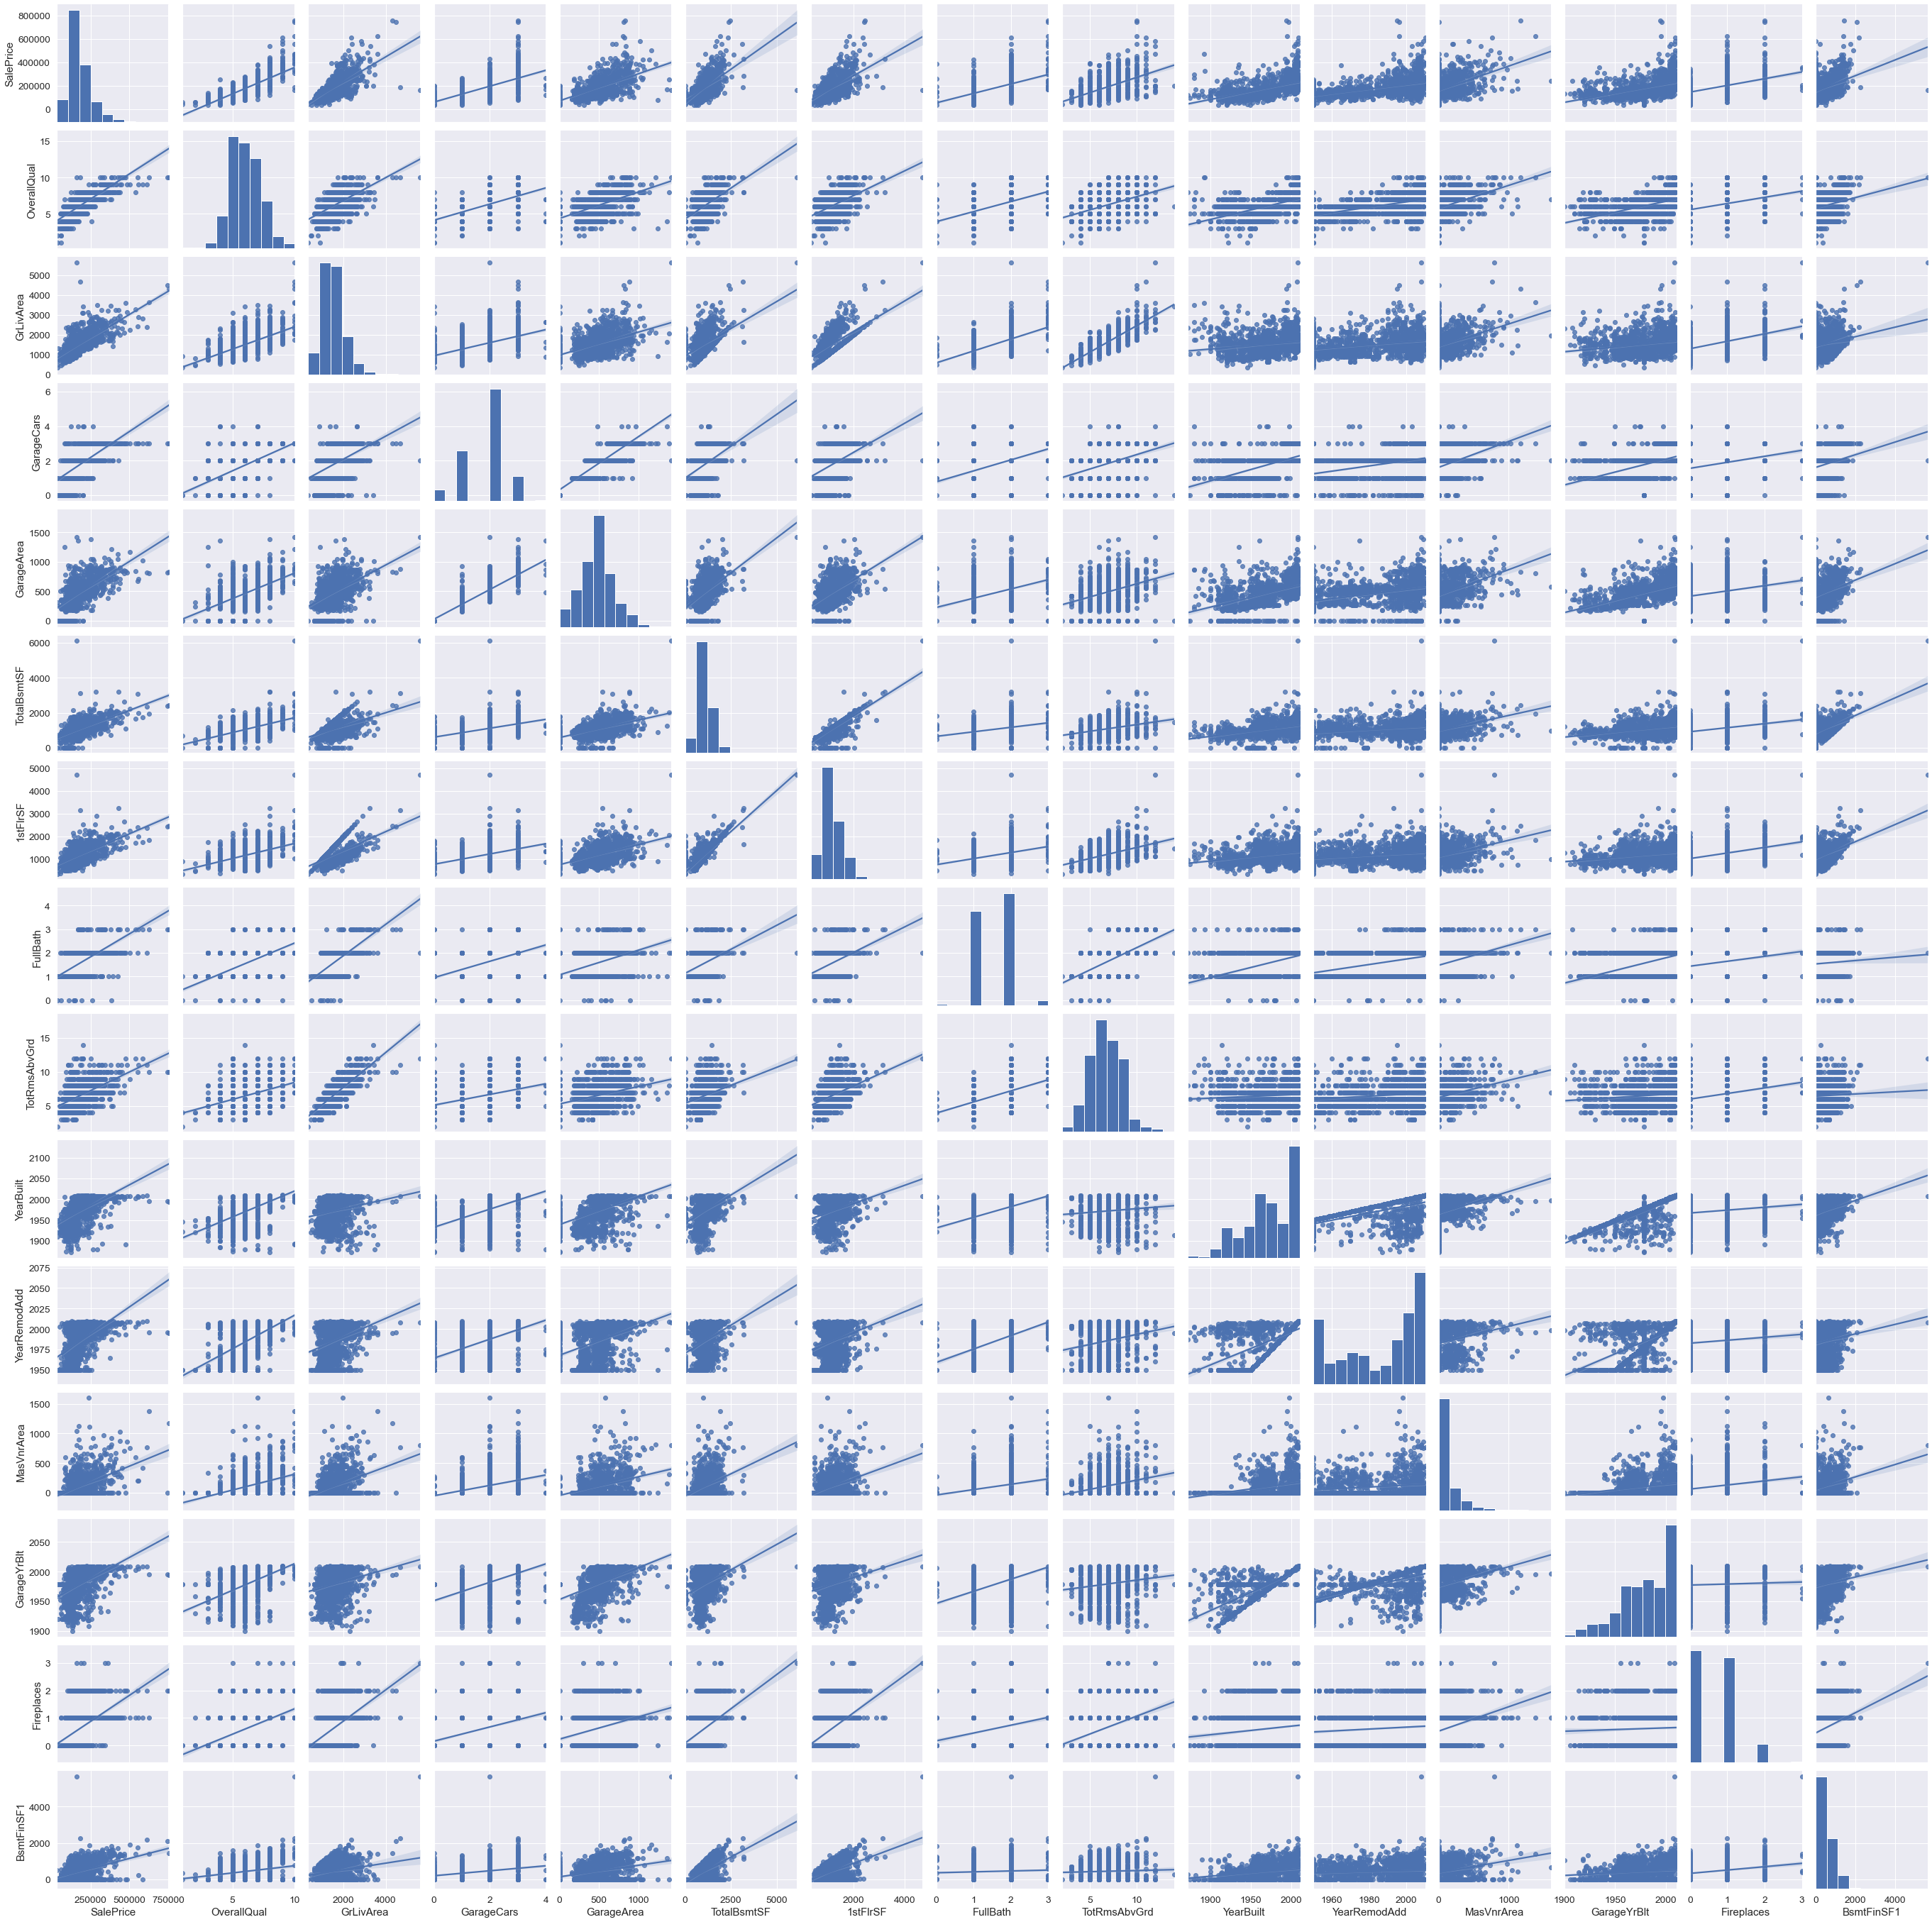

In [40]:
sns.pairplot(train, kind='reg')

### 1. Lineer Regresyon
Çoklu lineer regresyon birden fazla değişkene bağlı olan ve bağımlı değişkeni doğrusal bir artış gösteren verisetlerindeki değişkenlerin arasındaki bağıntıyı bulmaya yarayan yöntemdir.

Şimdi verileri bir eğitim seti ve test setine ayıralım. Modeli eğitim setinde eğiteceğiz ve ardından modeli değerlendirmek için test setini kullanacağız.

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3, random_state=101)
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

In [42]:
X_train.shape

(1022, 14)

In [43]:
y_train.shape

(1022, 1)

In [44]:
X_test.shape

(438, 14)

In [45]:
y_test.shape

(438, 1)

#### 1.1. Eğitim

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
lm = LinearRegression()

In [47]:
model = lm.fit(X_train, y_train)

In [48]:
model.intercept_ # sabit katsayı

array([-1325679.28294353])

In [49]:
model.coef_ # tüm bağımsız değişkenlerin katsayıları

array([[ 1.70299798e+04,  4.79783730e+01,  5.43751772e+03,
         2.39115547e+01,  2.25419063e+01,  4.67286407e+00,
        -6.43069132e+03,  1.64648366e+03,  2.05757148e+02,
         3.67656771e+02,  2.46843966e+01,  6.39776590e+01,
         5.66767792e+03,  2.50672344e+01]])

In [50]:
model.score(X_train, y_train) # R2 değeri

0.8238449454944372

#### 1.2. Tahmin

X_test bağımsız değişkenleri tahmin için verildiğinde model tarafından yapılan fiyat tahminleri aşağıdaki gibidir.

In [51]:
model.predict(X_test)[0:10] # tahmin sonuçlarından ilk 10 tanesini listele

array([[268917.97599405],
       [136099.90102434],
       [140347.02664263],
       [365911.34149788],
       [365697.64770414],
       [ 91996.38553172],
       [128642.04974314],
       [161106.90345774],
       [165777.34840392],
       [161207.7973208 ]])

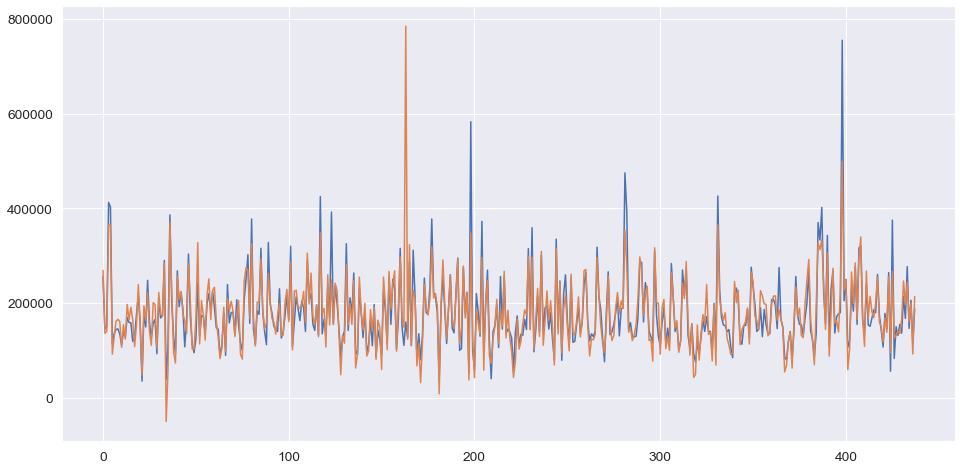

In [52]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(model.predict(X_test), label = 'predict')
plt.show()

Tahmin doğrusu üzerindeki gerçek fiyatların dağılımını inceleyelim

Text(0.5, 0, 'Gerçek Fiyat')

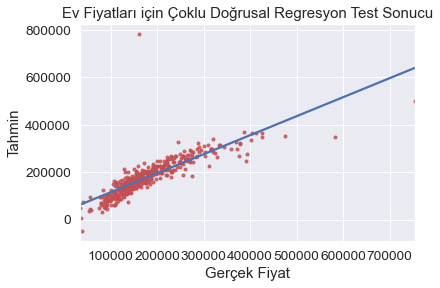

In [53]:
g=sns.regplot(y=model.predict(X_test), x=y_test, ci=None, scatter_kws={'color': 'r', 's':9})
g.set_title("Ev Fiyatları için Çoklu Doğrusal Regresyon Test Sonucu")
g.set_ylabel("Tahmin")
g.set_xlabel("Gerçek Fiyat")

Tahmin doğrusu ve civarındaki dağılıma baktığımızda underfitting (Yüksek yanlılık) gözlemlenmektedir.

#### 1.3. Model Doğrulama

__r^2 değeri:__

r2, bağımlı değişkendeki(__y__) değişikliğin bağımsız değişkenlerce açıklanabilme olasılığıdır. Üzerinde çalıştığımız veri seti için r2 yaklaşık %82'dir.

In [54]:
model.score(X_train, y_train)

0.8238449454944372

__10 farklı gözlemle (örneklem) r2 karşılaştırması (Valid R2 Değer Hesaplaması):__

Daha kesin sonuç için n tane örneklem ile yapılan tahminlerin ortalaması alınarak hesaplanır.

In [55]:
cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean() # cross validation - train r2 değeri

0.8152273506542949

In [56]:
cross_val_score(model, X_test, y_test, cv=10, scoring="r2").mean() # 10 farklı gözlemle r2 ortalaması - test r2 değeri

0.49269605925333365

Eğitim r2 değerine baktığımız da algoritmanın iyi öğrenemediğini görmekteyiz.

Eğitim Hatası

In [57]:
rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")).mean() #rmse değeri - eğitim hatası
rmse

33531.838262631245

Test Hatası

In [58]:
rmse = np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, scoring="neg_mean_squared_error")).mean() #rmse değeri - test hatası
rmse

45407.717773695345

__Özetle:__

MAE, MSE ve RMSE değerleri aşağıdaki gibidir. Tüm modellerin kıyaslamasında RMSE değeri üzerinden yorum yapılacaktır.

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, model.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, model.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))

MAE: 23674.402431943967
MSE: 1977086431.677962
RMSE: 44464.440080562825


### 2. Gradient Boosting Regresyon (GBR)
Gradient Boosting’de öncelikli olarak ilk yaprak(initial leaf) oluşturulur. Sonrasında tahmin hataları göz önüne alınarak yeni ağaçlar oluşturulur. Bu durum karar verilen ağaç sayısına ya da modelden daha fazla gelişme kaydedilemeyinceye kadar devam eder.

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

#### 2.1. Eğitim

In [61]:
params = {
    'n_estimators': 100, 
    'max_depth': 4, 
    'min_samples_split': 2,
    'learning_rate': 0.05, 
    'loss': 'ls'
}

clf = GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

C:\Users\alica\Anaconda3\envs\itu\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4)

#### 2.2. Tahmin

In [62]:
clf_pred=clf.predict(X_test)
#clf_pred= clf_pred.reshape(-1,1)

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 17270.26895705221
MSE: 680480834.2324106
RMSE: 26086.02756711743


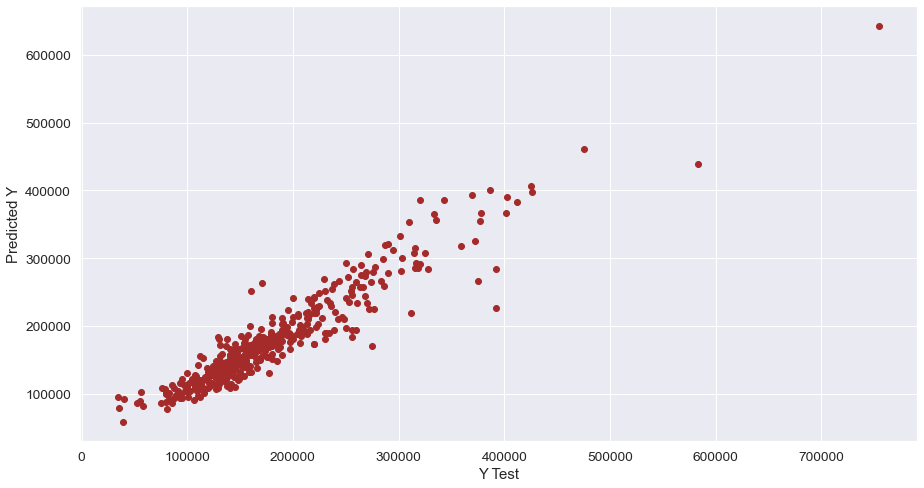

In [64]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

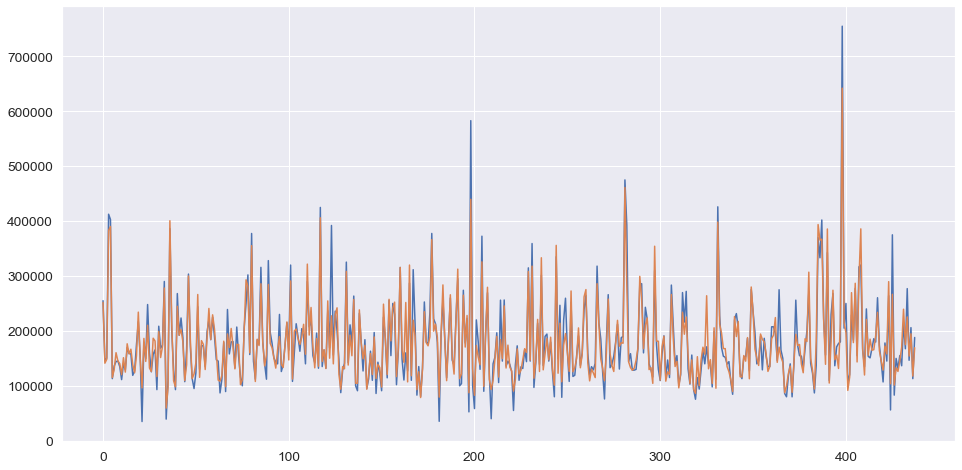

In [65]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(clf_pred, label = 'predict')
plt.show()

GBR Sonucu lineer regresyona göre çok başarılı.

#### 2.3. Model Tuning
Tune etmek için Grid Search Cross Validation methodunu kullanarak GBR için en uygun parametreleri tespit edip daha sonra tekrardan tahmin ettireceğiz.

In [66]:
gbm_params = {
    'learning_rate': [0.001,0.01,0.1,0.2],
    'max_depth': [3,5,8,50,100],
    'n_estimators': [200,500,1000,2000],
    'subsample': [1,0.5,0.75]
}

In [67]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 28.0min finished
C:\Users\alica\Anaconda3\envs\itu\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

Train işlemi sonucunda algoritma için en iyi parametreler aşağıdaki gibi belirlendi

In [68]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}

In [102]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5)

In [103]:
gbm_tuned = gbm_tuned.fit(X_train, y_train)

C:\Users\alica\Anaconda3\envs\itu\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [104]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

27698.601168206143

Tuning sonucunda GridSearchCV ile veri setimiz için en uygun eğitim parametrelerini bulduk ve tekrar predict ettiğimizde çıkan sonuç ile ilk sonuç arasında neredeyse hiç fark olmadığını görüyoruz.

ilk hesaplattığımız rmse=26086

tuning sonucunda hesaplanan rmse=27698


### 3. Support Vector Machine Regresyon
Buradaki amaç, bir marjin aralığında maksimum noktayı en küçük hata ile alabilecek şekilde doğru ya da eğriyi belirlemektir.

### 3.1. Eğitim

In [72]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)

C:\Users\alica\Anaconda3\envs\itu\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(kernel='linear')

### 3.2. Tahmin

In [73]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 25754.62409794169
MSE: 2406094609.8299217
RMSE: 49051.95826702459


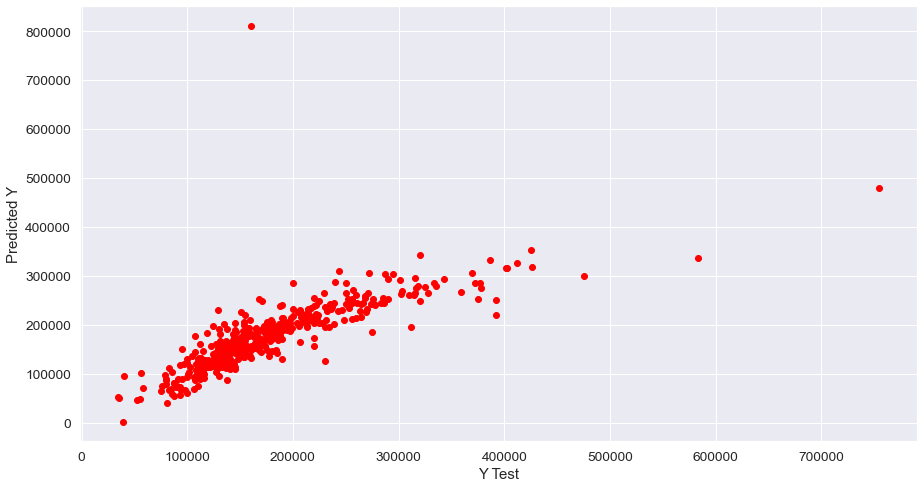

In [75]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

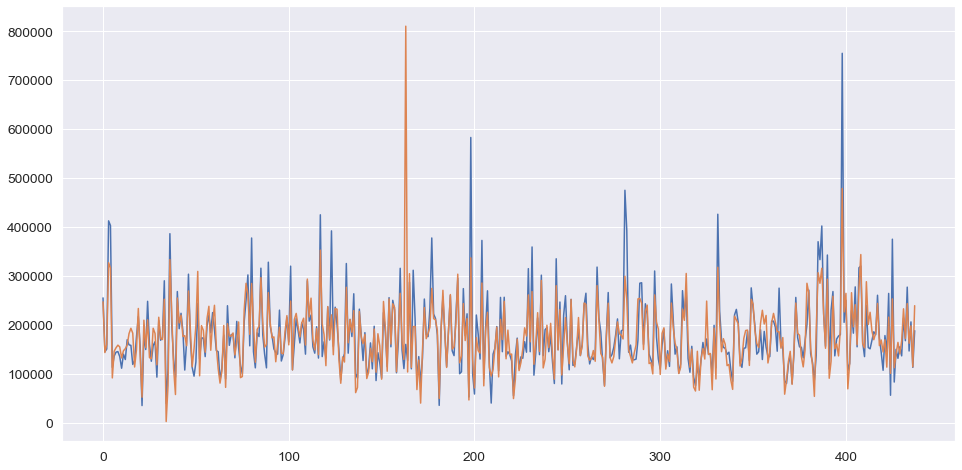

In [76]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(svr_pred, label = 'predict')
plt.show()

#### 3.3. Tuning

In [77]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr, svr_params, cv=10).fit(X_train, y_train)

C:\Users\alica\Anaconda3\envs\itu\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\alica\Anaconda3\envs\itu\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\alica\Anaconda3\envs\itu\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\alica\Anaconda3\envs\itu\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [78]:
svr_cv_model.best_params_

{'C': 1.9000000000000001}

In [79]:
svr_tuned = SVR("linear", C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

C:\Users\alica\Anaconda3\envs\itu\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\alica\Anaconda3\envs\itu\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [80]:
y_pred = svr_tuned.predict(X_test)

In [81]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 48849.95927608538


Tuning işleminden sonra doğrulanmış test hatasında büyük bir değişiklik gözlenmemiştir.

### 4. Random Forest Regresyon
RF Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

#### 4.1. Eğitim

In [82]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

<ipython-input-82-4b474202a588>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

#### 4.2. Tahmin

In [83]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

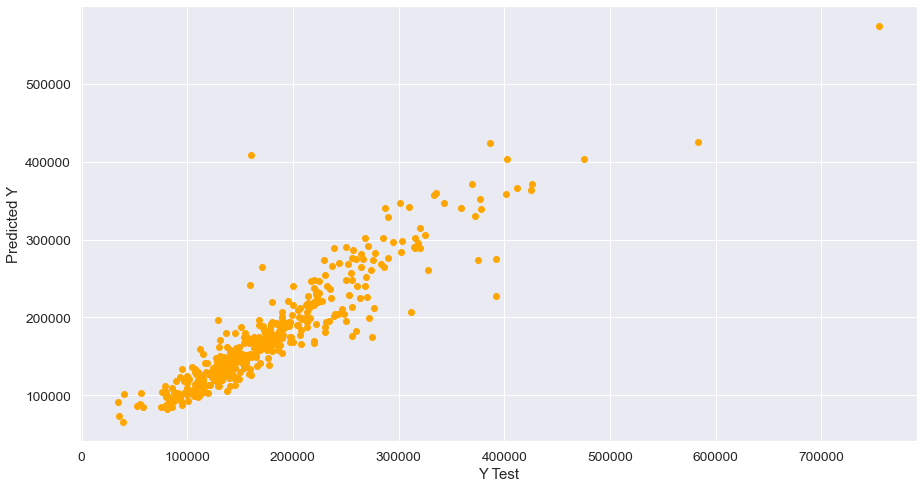

In [84]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

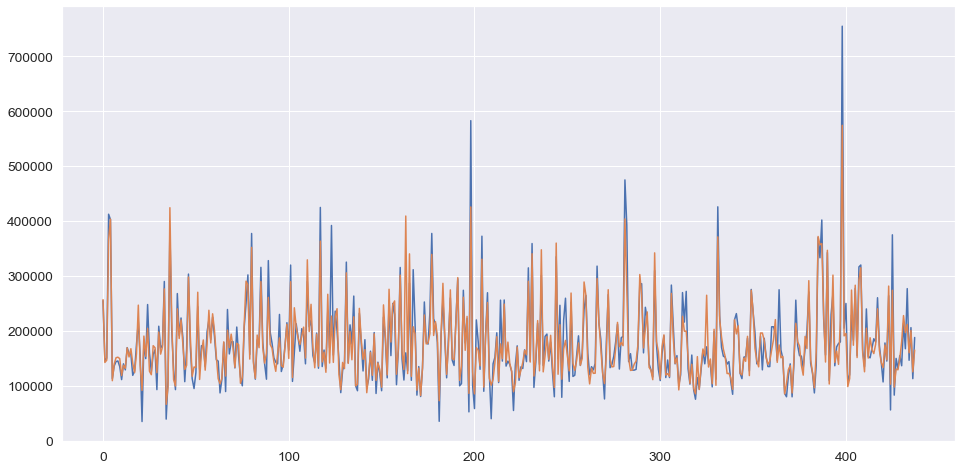

In [85]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(rfr_pred, label = 'predict')
plt.show()

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 18586.990125570777
MSE: 934040445.2634796
RMSE: 30562.07527743297


#### 4.3. Model Tuning
Random Forest'da önemli olan 2 parametre var. Bunlar, fit edilecek ağaç sayısı ve bölünmelerde kullanılacak olan değişken sayısıdır. RF'te ağaç sayısı için üzerinde bulunduğu veri setlerinde iyi çalıştığına inanılan 2 değer var. 500 ve 1000 değerleri. RF için ben de 500 ve 1000 sayılarını deneyeceğim.

In [87]:
rf_params={
    'max_depth': list(range(1,10)),
    'max_features': [3,5,10,15],
    'n_estimators': [100, 200, 500, 1000, 2000] # ağaç sayısı
}

In [88]:
rf_model = RandomForestRegressor(random_state=42)

In [89]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1)

In [90]:
rf_cv_model.fit(X_train, y_train)

C:\Users\alica\Anaconda3\envs\itu\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [91]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 3, 'n_estimators': 2000}

Cross validation sonucunda en iyi sonucu yukarıdaki parametrelerle alacağımızı görüyoruz.

In [92]:
rf_tuned = RandomForestRegressor(max_depth=9, max_features=3, n_estimators=2000)

In [93]:
rf_tuned.fit(X_train, y_train)

<ipython-input-93-ddcb808e11c0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tuned.fit(X_train, y_train)


RandomForestRegressor(max_depth=9, max_features=3, n_estimators=2000)

In [94]:
y_pred = rf_tuned.predict(X_test)

In [95]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # doğrulanmış test hatası

RMSE: 31035.57522072256


Tune etmemize rağmen sonucun değişmediğini gözlemlemekteyiz. Bu sefer değişken önem sırasına da bakalım.

In [96]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100}, index=X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

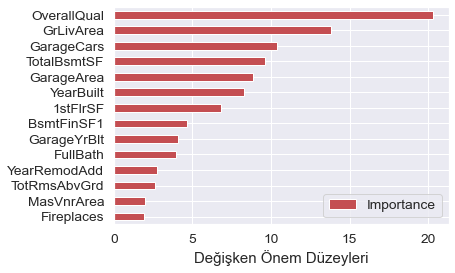

In [97]:
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel("Değişken Önem Düzeyleri")

## Sonuç - Modeller Arası Kıyaslama
RMSE oranlarına yani test hatası değerlerine bakarak en iyi performansı Gradient Boosting Regresyon modelinin verdiğini görmekteyiz.

__RMSE Nedir?__

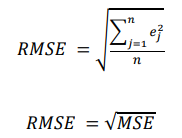

Bir makine öğrenmesi modelinin, tahminleyicinin tahmin ettiği değerler ile gerçek değerleri arasındaki uzaklığın bulunmasında sıklıkla kullanılan, hatanın büyüklğünü ölçen kuadratik bir metriktir. 

- RMSE tahmin hatalarının (kalıntıların) standart sapmasıdır. Yani, kalıntılar, regresyon hattının veri noktalarından ne kadar uzakta olduğunun bir ölçüsüdür. 

RMSE ise bu kalıntıların ne kadar yayıldığının bir ölçüsüdür. Başka bir deyişle, verilere en iyi uyan çizgi etrafında o verilerin ne kadar yoğun olduğunu söyler. 

- RMSE değeri 0’dan ∞’a kadar değişebilir. 

Negatif yönelimli puanlar yani daha düşük değerlere sahip tahminleyiciler daha iyi performans gösterir. __RMSE değerinin sıfır olması modelin hiç hata yapmadığı anlamına gelir.__ RMSE, büyük hataları daha fazla cezalandırmanın avantajına sahiptir, bu yüzden bazı durumlara daha uygun olabilir. RMSE, birçok matematiksel hesaplamada istenmeyen mutlak değerin kullanılmasını engeller.

In [98]:
print("Lineer Regresyon RMSE= "+str(np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))))
print("Gradient Boosting Regresyon RMSE= "+str(np.sqrt(metrics.mean_squared_error(y_test, clf_pred))))
print("Support Vector Doğrusal Regresyon RMSE= "+str(np.sqrt(metrics.mean_squared_error(y_test, svr_pred))))
print("Random Forest Regresyon RMSE= "+str(np.sqrt(metrics.mean_squared_error(y_test, rfr_pred))))

Lineer Regresyon RMSE= 44464.440080562825
Gradient Boosting Regresyon RMSE= 26086.02756711743
Support Vector Doğrusal Regresyon RMSE= 49051.95826702459
Random Forest Regresyon RMSE= 30562.07527743297


In [99]:
error_rate=np.array(
    [
        np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))), # Lineer Regresyon
        np.sqrt(metrics.mean_squared_error(y_test, clf_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, svr_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, rfr_pred))
    ])

In [100]:
error_rate

array([44464.44008056, 26086.02756712, 49051.95826702, 30562.07527743])

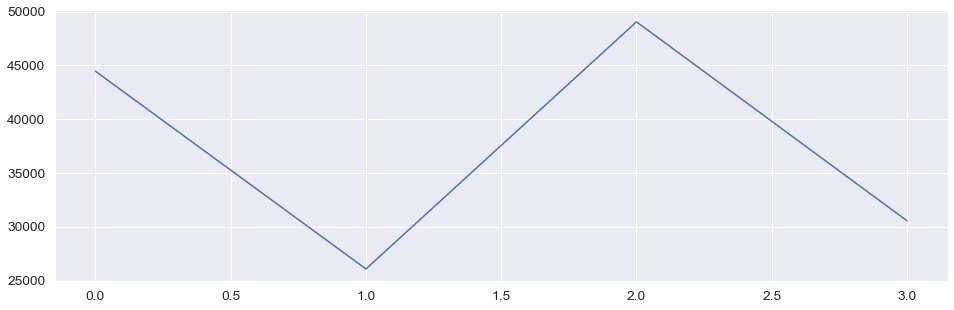

In [101]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)